<a href="https://colab.research.google.com/github/fnilvuwu/facial-age-estimation-website/blob/main/CNN_Age_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab.patches import cv2_imshow
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Reshape, LSTM, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG19

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!tar -xf "/content/drive/MyDrive/UTKFace.tar.gz"

In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Set path to UTKFace dataset
data_path = '/content/UTKFace'

# Load the list of filenames
filenames = os.listdir(data_path)

# Split the filenames into training and validation sets
train_filenames, val_filenames = train_test_split(filenames, test_size=0.2, random_state=42)

# Define function to load and preprocess images
def load_image(filename):
    if (len(filename.split('_')) == 4):
        age, _, _, _ = filename.split('_')
    else:
        age, _, _ = filename.split('_')
    img = cv2.imread(os.path.join(data_path, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img.astype(np.float32) / 255.0
    age_label = int(age)
    return img, age_label



def data_generator(filenames, batch_size):
    while True:
        np.random.shuffle(filenames)
        for i in range(0, len(filenames), batch_size):
            batch_filenames = filenames[i:i+batch_size]
            batch_images = []
            batch_age_labels = []
            for filename in batch_filenames:
                if filename.endswith('.jpg'):
                    img, age_label = load_image(filename)
                    batch_images.append(img)
                    batch_age_labels.append(age_label)
            batch_images = np.array(batch_images)
            batch_age_labels = np.array(batch_age_labels)
            yield batch_images, batch_age_labels

# Define the DL-DL v2 architecture
def create_model():
    model = tf.keras.Sequential()
    
    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))  # Output layer for age prediction
    
    return model

# Create an instance of the DL-DL v2 model
model = create_model()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 128)     

In [8]:
# Define batch size and number of epochs
batch_size = 128
epochs = 30

# Create data generators for training and validation
train_data_gen = data_generator(train_filenames, batch_size)
val_data_gen = data_generator(val_filenames, batch_size)

# Train the model and store the training history
history = model.fit(train_data_gen, steps_per_epoch=len(train_filenames) // batch_size, epochs=epochs, validation_data=val_data_gen, validation_steps=len(val_filenames) // batch_size)


Epoch 1/30
148/148 [==============================] - 73s 393ms/step - loss: 467.2346 - mae: 16.5270 - mse: 467.2346 - accuracy: 0.0464 - val_loss: 400.6254 - val_mae: 15.8140 - val_mse: 400.6254 - val_accuracy: 0.0500
Epoch 2/30
148/148 [==============================] - 67s 449ms/step - loss: 347.6266 - mae: 14.3133 - mse: 347.6266 - accuracy: 0.0467 - val_loss: 223.6610 - val_mae: 11.4247 - val_mse: 223.6610 - val_accuracy: 0.0498
Epoch 3/30
148/148 [==============================] - 54s 369ms/step - loss: 224.2467 - mae: 11.2213 - mse: 224.2467 - accuracy: 0.0385 - val_loss: 174.6644 - val_mae: 9.5329 - val_mse: 174.6644 - val_accuracy: 0.0361
Epoch 4/30
148/148 [==============================] - 55s 375ms/step - loss: 163.1542 - mae: 9.3687 - mse: 163.1542 - accuracy: 0.0364 - val_loss: 146.8018 - val_mae: 9.0975 - val_mse: 146.8018 - val_accuracy: 0.0300
Epoch 5/30
148/148 [==============================] - 56s 377ms/step - loss: 134.9995 - mae: 8.4423 - mse: 134.9995 - accuracy:

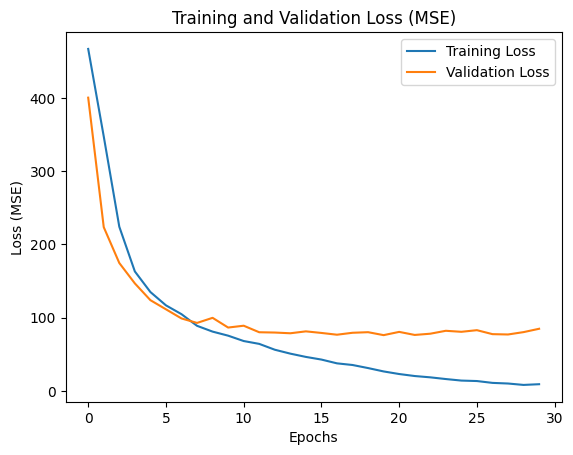

In [14]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

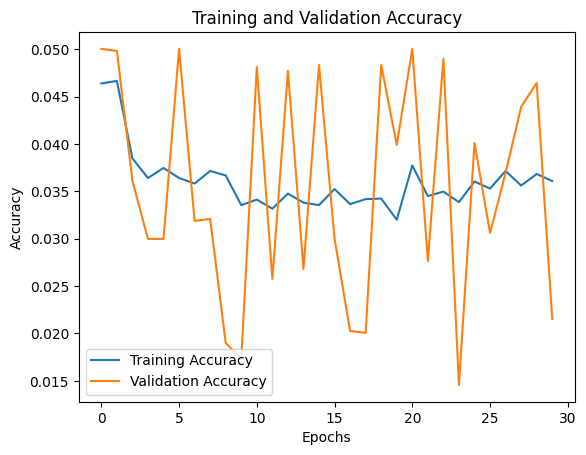

In [10]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

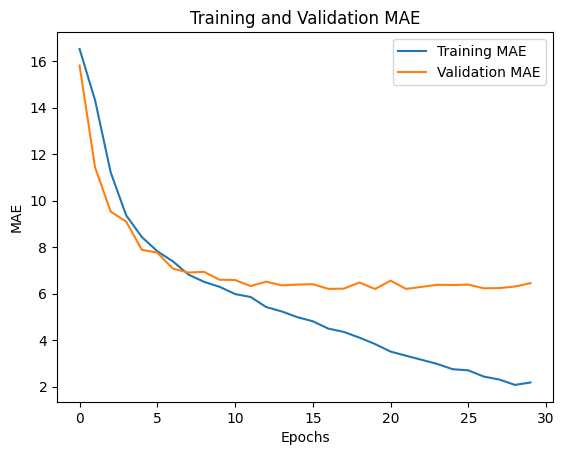

In [12]:
# Plot the training and validation mae
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

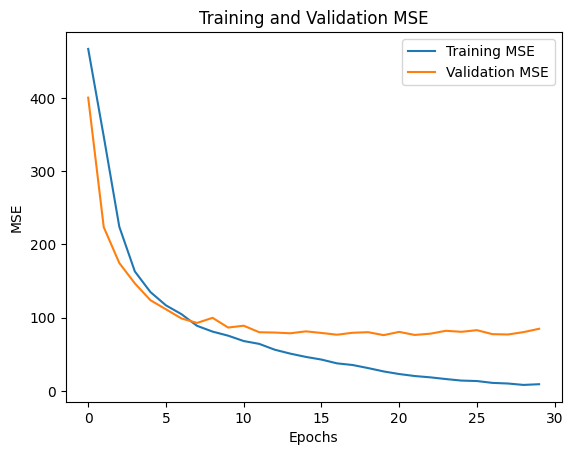

In [13]:
# Plot the training and validation mse
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the validation set
val_loss, val_mae = model.evaluate(val_data_gen, steps=len(val_filenames) // batch_size)
print("Validation Loss:", val_loss)
print("Validation MAE:", val_mae)


37/37 [==============================] - 9s 252ms/step - loss: 83.1928 - mae: 6.3576
Validation Loss: 83.19278717041016
Validation MAE: 6.3576340675354
